In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import arviz as az

%matplotlib inline

## Generate Mock Data

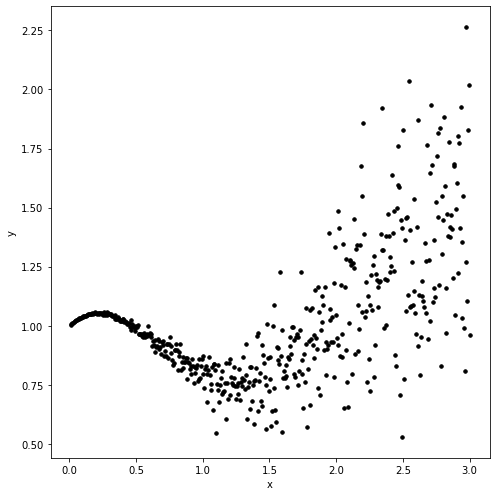

In [30]:
seed = 1994351
x = np.linspace(0.01,3, 500)
y = .5*x + .3**(x**2) + np.random.normal(loc=0, scale=(.05*(x**2)))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='k', s=12)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

## Kernel Density Estimation

Visualize 1D Kernel Density Estimation (KDE) using arviz

<AxesSubplot:>

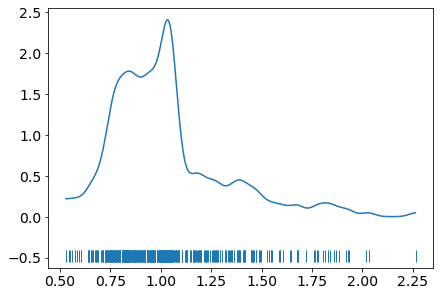

In [50]:
az.plot_kde(y, rug=True)

C:\ProgramData\Miniconda3\envs\astroml38\lib\site-packages\arviz\stats\density_utils.py:252: RuntimeWarning: divide by zero encountered in double_scalars
  out = t - (2 * N * np.pi ** 0.5 * f) ** (-0.4)


<AxesSubplot:>

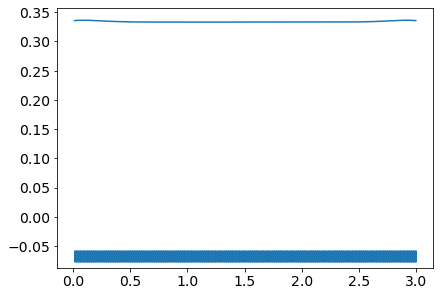

In [51]:
az.plot_kde(x, rug=True)

## Visualize 2D KDE using arviz

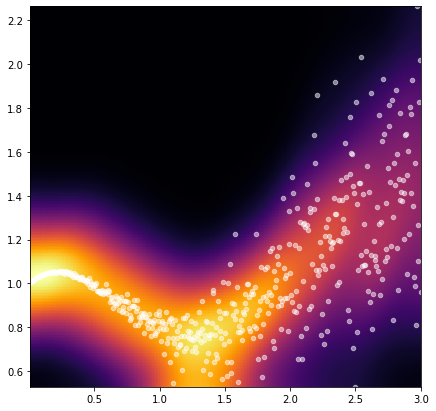

In [37]:
plt.figure(figsize=(7, 7))

az.plot_kde(x, values2=y, contour=False, pcolormesh_kwargs={'cmap': 'inferno'})
plt.scatter(x, y, facecolor='None', c='w', alpha=0.5, s = 20)

## Spline Regression

In [38]:
data_x = x
data_y = y

# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.25, random_state = 1)

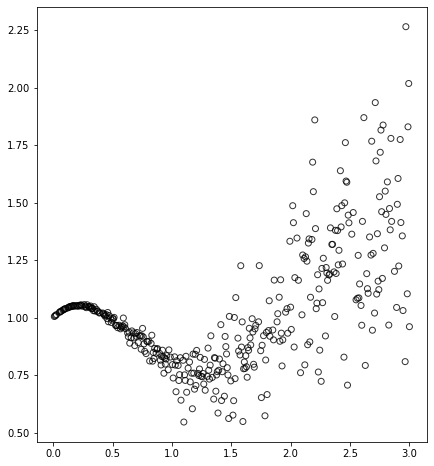

In [39]:
# Visualize the relationship
import matplotlib.pyplot as plt

plt.figure(figsize=(7,8))
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.8)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.3, random_state = 11343)

In [41]:
from patsy import dmatrix
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

Here are the documentations for patsy and stasmodels

https://patsy.readthedocs.io/en/latest/API-reference.html <br>
https://www.statsmodels.org/stable/index.html

In [42]:
knots = 5
degree = 3 # try different knots and degree values

X_spline = dmatrix('bs(x,df = '+str(knots)+', degree = '+str(degree)+', include_intercept = False)', {'x': X_train},return_type = 'dataframe')
spline_fit = sm.GLM(y_train,X_spline).fit()

y_pred_train = spline_fit.predict(dmatrix('bs(test, df = '+str(knots)+', degree = '+str(degree)+', include_intercept = False)', {'test': X_train},return_type = 'dataframe'))
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
print(rmse_train)   
print(r2_score(y_train,y_pred_train))

0.19955341859883166
0.5199479196295604


In [43]:
y_pred = spline_fit.predict(dmatrix('bs(test, df = '+str(knots)+', degree = '+str(degree)+', include_intercept = False)', {'test': X_test},return_type = 'dataframe'))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse_test)
print(r2_score(y_test,y_pred))

0.16417901809274257
0.5929972934824088


In [44]:
range_pred = np.linspace(np.min(X_train),np.max(X_train),50)
prediction = spline_fit.predict(dmatrix('bs(xp, df = '+str(knots)+', degree = '+str(degree)+',include_intercept = False)', {'xp': range_pred},return_type = 'dataframe'))

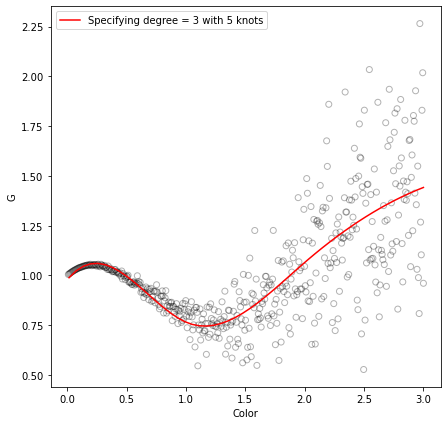

In [45]:
plt.figure(figsize=(7,7))
plt.plot(range_pred, prediction, color='r', label='Specifying degree = '+str(degree)+' with '+str(knots)+' knots')
plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel('Color')
plt.ylabel("G")
plt.legend()

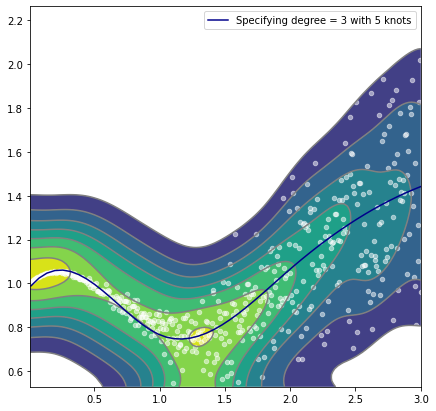

In [46]:
plt.figure(figsize=(7, 7))

az.plot_kde(x, values2=y)#, contour=False, pcolormesh_kwargs={'cmap': 'inferno'})
plt.scatter(x, y, facecolor='None', c='w', alpha=0.5, s = 20)
plt.plot(range_pred, prediction, color='darkblue', label='Specifying degree = '+str(degree)+' with '+str(knots)+' knots')
plt.legend()

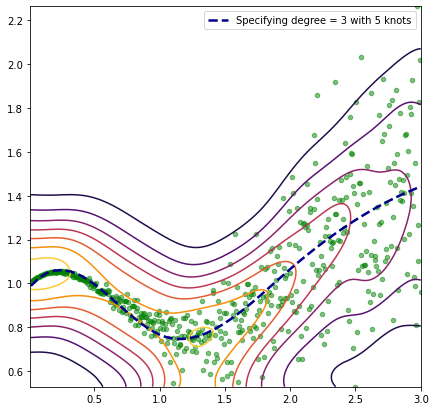

In [47]:
plt.figure(figsize=(7, 7))

az.plot_kde(x, values2=y, contour_kwargs={"colors":None, "cmap":plt.cm.inferno}, contourf_kwargs={"alpha":0})
plt.scatter(x, y, facecolor='None', c='g', alpha=0.5, s = 20)
plt.plot(range_pred, prediction, color='darkblue', label='Specifying degree = '+str(degree)+' with '+str(knots)+' knots', linestyle='--', linewidth=2.5)
plt.legend()

## Assignments

1. Get the members of three clusters in HDBSCAN Hands-on session
2. Make 2D kernel for each cluster
3. Get the Main-sequence diagonal line in CMD using spline regression